In [4]:
import pandas as pd

df = pd.read_csv("../data/second_3_games.csv")

df.head()

,time_frame,goals_for_avg,goals_against_avg,shots_on_target_%,crosses,poss_%,min_poss_to_score,pass_success_rate,num_pass_strings,avg_pass_string,atk_third_pass_success_%,mid_third_pass_success_%,def_third_pass_success_%
0,0-15,0.3,0.0,57.1,3.0,58.3,17:48,76,7.3,5.0,59,78,79
1,16-30,0.7,0.0,40.0,3.3,61.3,7:43,74,7.0,4.4,68,73,83
2,31-45,0.3,0.0,66.7,1.7,63.7,17:15,80,8.3,5.4,70,80,84
3,46-60,0.3,0.0,50.0,2.0,64.3,10:40,79,3.7,4.5,68,82,75
4,61-75,0.3,0.3,75.0,1.3,54.1,13:47,76,5.7,5.6,64,76,81


In [5]:
# convert minutes column to seconds
df[['minutes', 'seconds']] = df['min_poss_to_score'].str.split(
    ':', expand=True)

df['minutes'] = [int(minutes) for minutes in df['minutes']]
df['seconds'] = [int(seconds) for seconds in df['seconds']]

df['sec_poss_to_score'] = df['minutes'] * 60 + df['seconds']

df = df.drop(['minutes', 'seconds', "min_poss_to_score"], axis=1)

df

,time_frame,goals_for_avg,goals_against_avg,shots_on_target_%,crosses,poss_%,pass_success_rate,num_pass_strings,avg_pass_string,atk_third_pass_success_%,mid_third_pass_success_%,def_third_pass_success_%,sec_poss_to_score
0,0-15,0.3,0.0,57.1,3.0,58.3,76,7.3,5.0,59,78,79,1068
1,16-30,0.7,0.0,40.0,3.3,61.3,74,7.0,4.4,68,73,83,463
2,31-45,0.3,0.0,66.7,1.7,63.7,80,8.3,5.4,70,80,84,1035
3,46-60,0.3,0.0,50.0,2.0,64.3,79,3.7,4.5,68,82,75,640
4,61-75,0.3,0.3,75.0,1.3,54.1,76,5.7,5.6,64,76,81,827
5,76-90,0.3,0.3,100.0,0.3,42.6,67,3.3,3.6,20,66,78,412


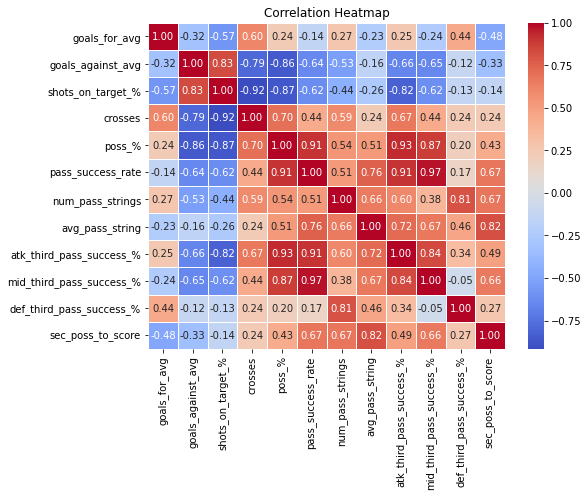

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
# interesting correlations:
# goals_for_avg, sec_poss_to_score
# num_pass_strings, goals_against avg
# shots on target, crosses
# shots on target, num_pass_strings
# shots on target, mid_third_pass_success_rate
# crosses, mid_third_success-rate
# num_pass_strings --> mid_third_pass_success
# attack rate success in pass scuess vs mid vs def

# seems like: controlling it very well in mid; not so much otherwise
# when we lose mid, we get score on the most

In [7]:
# correlation_matrix["goals_against_avg"]
correlation_matrix.sort_values(by="goals_against_avg", ascending=True)[
    "goals_against_avg"]

poss_%                     -0.857087
crosses                    -0.792629
atk_third_pass_success_%   -0.655495
mid_third_pass_success_%   -0.652056
pass_success_rate          -0.640870
num_pass_strings           -0.528309
sec_poss_to_score          -0.333754
goals_for_avg              -0.316228
avg_pass_string            -0.157676
def_third_pass_success_%   -0.115728
shots_on_target_%           0.830724
goals_against_avg           1.000000
Name: goals_against_avg, dtype: float64

In [8]:
df.columns

Index(['time_frame', 'goals_for_avg', 'goals_against_avg', 'shots_on_target_%',
       'crosses', 'poss_%', 'pass_success_rate', 'num_pass_strings',
       'avg_pass_string', 'atk_third_pass_success_%',
       'mid_third_pass_success_%', 'def_third_pass_success_%',
       'sec_poss_to_score'],
      dtype='object')

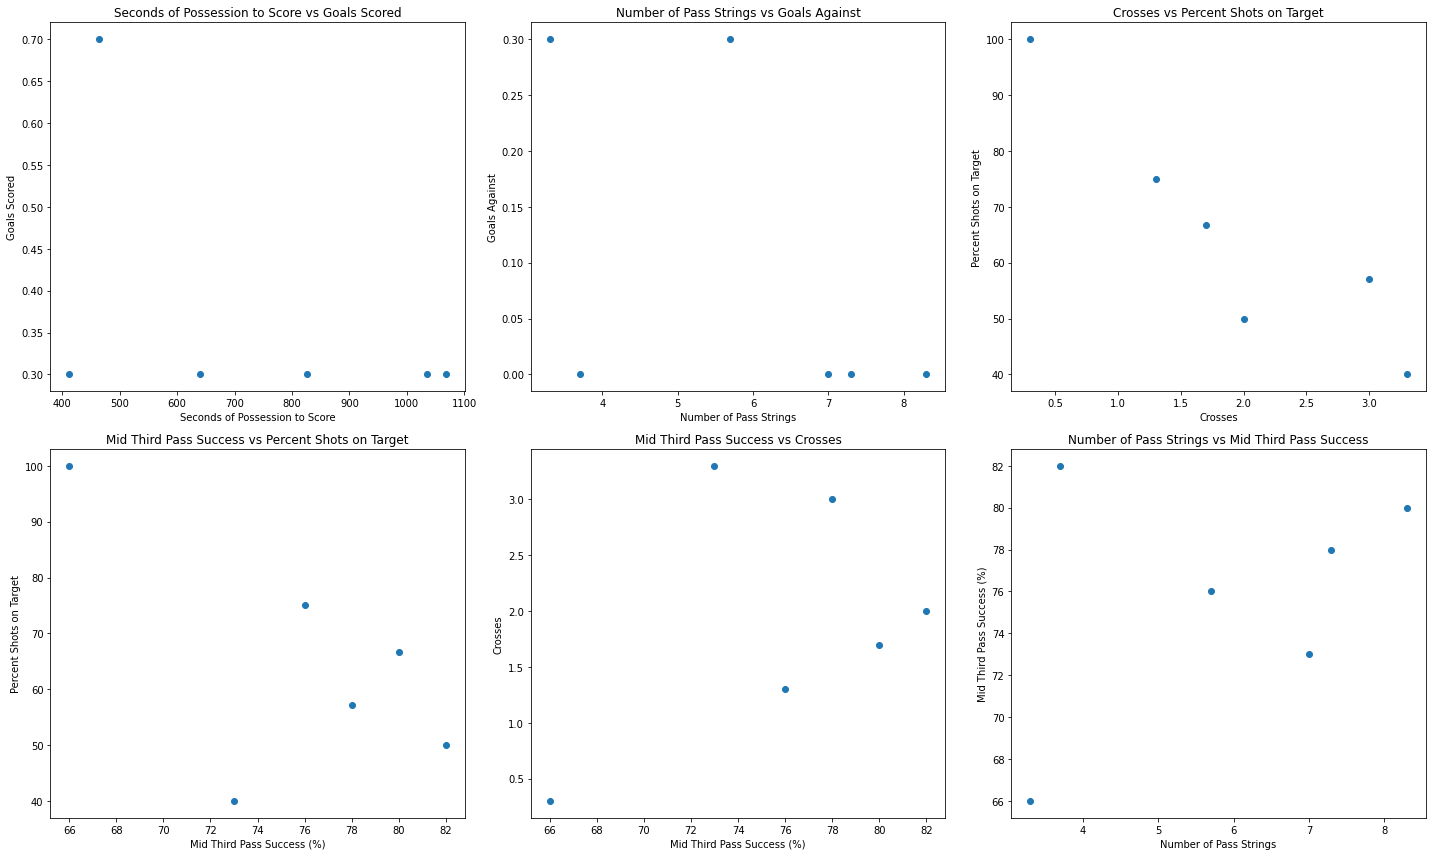

In [9]:
plt.figure(figsize=(20, 12))

# Scatterplot 1
plt.subplot(2, 3, 1)
plt.scatter(df['sec_poss_to_score'], df['goals_for_avg'])
plt.title('Seconds of Possession to Score vs Goals Scored')
plt.xlabel('Seconds of Possession to Score')
plt.ylabel('Goals Scored')

# Scatterplot 2
plt.subplot(2, 3, 2)
plt.scatter(df['num_pass_strings'], df['goals_against_avg'])
plt.title('Number of Pass Strings vs Goals Against')
plt.xlabel('Number of Pass Strings')
plt.ylabel('Goals Against')

# Scatterplot 3
plt.subplot(2, 3, 3)
plt.scatter(df['crosses'], df['shots_on_target_%'])
plt.title('Crosses vs Percent Shots on Target')
plt.xlabel('Crosses')
plt.ylabel('Percent Shots on Target')

# Scatterplot 4
plt.subplot(2, 3, 4)
plt.scatter(df['mid_third_pass_success_%'], df['shots_on_target_%'])
plt.title('Mid Third Pass Success vs Percent Shots on Target')
plt.xlabel('Mid Third Pass Success (%)')
plt.ylabel('Percent Shots on Target')

# Scatterplot 5
plt.subplot(2, 3, 5)
plt.scatter(df['mid_third_pass_success_%'], df['crosses'])
plt.title('Mid Third Pass Success vs Crosses')
plt.xlabel('Mid Third Pass Success (%)')
plt.ylabel('Crosses')

# Scatterplot 6
plt.subplot(2, 3, 6)
plt.scatter(df['num_pass_strings'], df['mid_third_pass_success_%'])
plt.title('Number of Pass Strings vs Mid Third Pass Success')
plt.xlabel('Number of Pass Strings')
plt.ylabel('Mid Third Pass Success (%)')

plt.tight_layout()
plt.show()

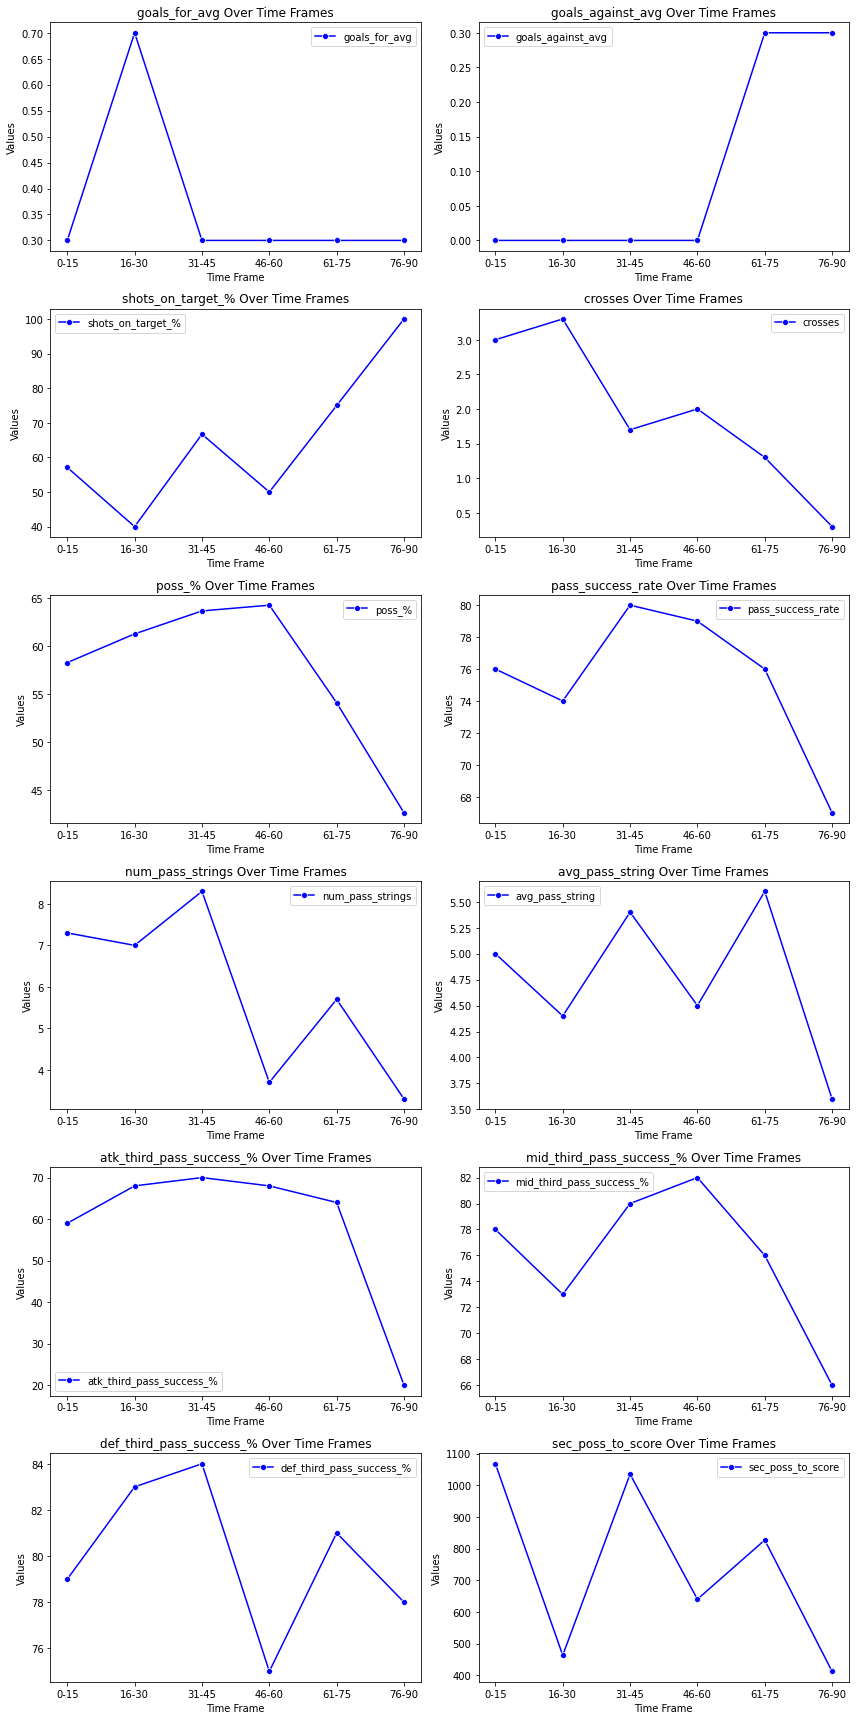

In [10]:

# Set the 'timeFrame' column as the index for better plotting
df_copy = df.set_index('time_frame', inplace=False)

# Draw line plots for each column against timeFrame
# plt.figure(figsize=(10, 12))

# Calculate the number of rows needed for subplots
num_features = len(df_copy.columns)
num_rows = (num_features + 1) // 2  # Ensure at least 1 row

# Create subplots with two plots per row
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

for i, column in enumerate(df_copy.columns):
    sns.lineplot(data=df_copy[column], marker='o',
                 color='b', label=column, ax=axes[i])
    axes[i].set_title(f'{column} Over Time Frames')
    axes[i].set_xlabel('Time Frame')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Remove empty subplots if there are an odd number of features
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Time in game')

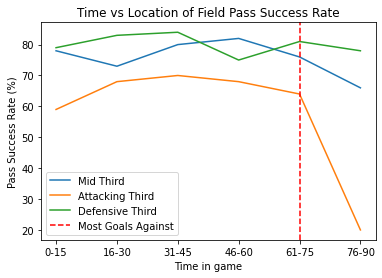

In [18]:
# tend to drop off at 31-45 minutes
plt.plot(df['time_frame'], df['mid_third_pass_success_%'],
         label="Mid Third")
plt.plot(df['time_frame'], df['atk_third_pass_success_%'],
         label="Attacking Third")
plt.plot(df['time_frame'], df['def_third_pass_success_%'],
         label="Defensive Third")
plt.axvline(x="61-75", color='r', linestyle='--',
            label='Most Goals Against')

plt.title('Time vs Location of Field Pass Success Rate')
plt.legend()
plt.ylabel('Pass Success Rate (%)')
plt.xlabel('Time in game')

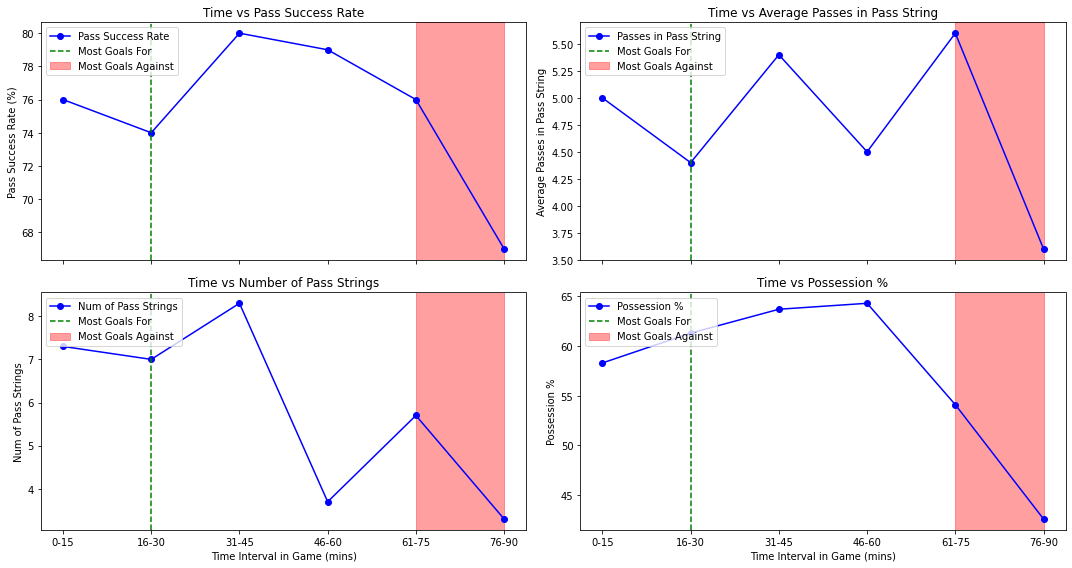

In [35]:
def plot_possession_graphs(top_time_against, top_time_for):
    fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

    axes[0, 0].plot(df['time_frame'], df['pass_success_rate'],
                    label="Pass Success Rate", marker='o', color='b')
    axes[0, 0].set_ylabel('Pass Success Rate (%)')
    axes[0, 0].set_title('Time vs Pass Success Rate')

    axes[1, 0].plot(df['time_frame'], df['num_pass_strings'],
                    label="Num of Pass Strings", marker='o', color='b')
    axes[1, 0].set_title('Time vs Number of Pass Strings')
    axes[1, 0].set_ylabel('Num of Pass Strings')

    axes[0, 1].plot(df['time_frame'], df['avg_pass_string'],
                    label="Passes in Pass String", marker='o', color='b')
    axes[0, 1].set_title('Time vs Average Passes in Pass String')
    axes[0, 1].set_ylabel('Average Passes in Pass String')

    axes[1, 1].plot(df['time_frame'], df['poss_%'],
                    label="Possession %", marker='o', color='b')
    axes[1, 1].set_title('Time vs Possession %')
    axes[1, 1].set_ylabel('Possession %')

    if (type(top_time_against) == list):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvspan(top_time_against[0], top_time_against[1], color="#ff4040",
                                   alpha=0.5, label="Most Goals Against")
    elif (type(top_time_against) == str):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvline(x=top_time_against, color='r', linestyle='--',
                                   label='Most Goals Against')
    if (type(top_time_for) == list):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvspan(top_time_for[0], top_time_for[1], color="#ff4040",
                                   alpha=0.5, label="Most Goals Against")
    elif (type(top_time_for) == str):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvline(x=top_time_for, color='g', linestyle='--',
                                   label='Most Goals For')
    for i in range(0, 2):
        for j in range(0, 2):
            if (i != 0):
                # to make sure there are shared x-labels
                axes[i, j].set_xlabel('Time Interval in Game (mins)')
            axes[i, j].legend(loc='upper left')

    plt.tight_layout()
    plt.show()


plot_possession_graphs(["61-75", "76-90"], "16-30")

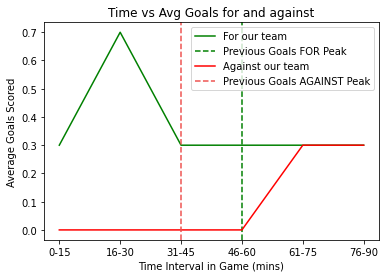

In [31]:
# ['time_frame', 'goals_for_avg', 'goals_against_avg', 'shots_on_target_%',
#    'crosses', 'poss_%', 'pass_success_rate', 'num_pass_strings',
#    'avg_pass_string', 'atk_third_pass_success_%',
#    'mid_third_pass_success_%', 'def_third_pass_success_%',
#    'sec_poss_to_score'],

plt.plot(df['time_frame'], df['goals_for_avg'],
         label="For our team", c="g")
plt.axvline(x="46-60", color='g', linestyle='--',
            label='Previous Goals FOR Peak')
plt.plot(df['time_frame'], df['goals_against_avg'],
         label="Against our team", c="r")
plt.axvline(x="31-45", color='#EE5350', linestyle='--',
            label='Previous Goals AGAINST Peak')
plt.title("Time vs Avg Goals for and against")
plt.xlabel("Time Interval in Game (mins)")
plt.ylabel("Average Goals Scored")
plt.legend()
plt.show()